In [1]:
import fastai
from fastai.tabular import *

In [2]:
adult = URLs.ADULT_SAMPLE
path = Path("F:\\data\\fastai")
fname =  path/"adult_sample.tar.gz"
dest = path/"adult_sample"

In [5]:
data_path = untar_data(adult,fname=fname,dest=dest)

In [8]:
! ls F:\\data\\fastai\\adult_sample

adult.csv
export.pkl
models


#### 观察数据

In [9]:
import pandas as pd

In [10]:
raw_data = pd.read_csv(dest/"adult.csv")

In [11]:
raw_data.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
0,49,Private,101320,Assoc-acdm,12.0,Married-civ-spouse,NaN,Wife,White,Female,0,1902,40,United-States,>=50k
1,44,Private,236746,Masters,14.0,Divorced,Exec-managerial,Not-in-family,White,Male,10520,0,45,United-States,>=50k
2,38,Private,96185,HS-grad,NaN,Divorced,NaN,Unmarried,Black,Female,0,0,32,United-States,<50k
3,38,Self-emp-inc,112847,Prof-school,15.0,Married-civ-spouse,Prof-specialty,Husband,Asian-Pac-Islander,Male,0,0,40,United-States,>=50k
4,42,Self-emp-not-inc,82297,7th-8th,NaN,Married-civ-spouse,Other-service,Wife,Black,Female,0,0,50,United-States,<50k


In [25]:
proce = [FillMissing,Categorify,Normalize]
cate = ["workclass","education","marital-status","occupation","relationship","race","sex"]
num = ["age","fnlwgt","education-num"]
dep_var = "salary"

#### 加载数据

In [26]:
raw_data.tail()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary
32556,36,Private,297449,Bachelors,13.0,Divorced,Prof-specialty,Not-in-family,White,Male,14084,0,40,United-States,>=50k
32557,23,?,123983,Bachelors,13.0,Never-married,?,Own-child,Other,Male,0,0,40,United-States,<50k
32558,53,Private,157069,Assoc-acdm,12.0,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>=50k
32559,32,Local-gov,217296,HS-grad,9.0,Married-civ-spouse,Transport-moving,Wife,White,Female,4064,0,22,United-States,<50k
32560,26,Private,182308,Some-college,10.0,Married-civ-spouse,Prof-specialty,Husband,White,Male,0,0,40,United-States,<50k


In [27]:
test_data = TabularList.from_df(df = raw_data.iloc[800:1000].copy(),cat_names=cate,cont_names=num,path=data_path)

In [32]:
data = (TabularList.from_df(df = raw_data,cat_names=cate,cont_names=num,procs=proce)
        .split_by_idx(list(range(800,1000)))
        .label_from_df(cols = dep_var)
       .add_test(test_data)
       .databunch())

In [33]:
data.show_batch(rows = 10)

workclass,education,marital-status,occupation,relationship,race,sex,education-num_na,age,fnlwgt,education-num,target
Private,HS-grad,Never-married,Adm-clerical,Own-child,White,Male,False,-1.4357,0.2051,-0.4224,<50k
Private,Some-college,Married-civ-spouse,Sales,Husband,White,Male,False,0.5434,0.3269,-0.0312,<50k
Private,Assoc-acdm,Never-married,Other-service,Own-child,White,Female,False,-1.1425,-0.2656,0.7511,<50k
Private,HS-grad,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,False,-0.6294,-0.2075,-0.4224,<50k
Private,Masters,Married-civ-spouse,Exec-managerial,Husband,White,Male,False,-0.1896,0.0865,1.5334,>=50k
Private,Some-college,Married-civ-spouse,Craft-repair,Husband,White,Male,False,-0.1896,-0.7451,-0.0312,<50k
Self-emp-not-inc,Some-college,Married-civ-spouse,Transport-moving,Husband,White,Male,False,0.4701,0.0354,-0.0312,<50k
Private,10th,Never-married,Handlers-cleaners,Not-in-family,White,Male,False,-1.2891,-1.2077,-1.5958,<50k
?,Some-college,Never-married,?,Own-child,White,Male,False,-1.4357,-0.4347,-0.0312,<50k
State-gov,Some-college,Never-married,Adm-clerical,Not-in-family,White,Female,False,-0.6294,0.0063,-0.0312,<50k


In [34]:
learnner = tabular_learner(data,layers=[100,50],metrics=accuracy)

In [56]:
learnner.fit(2,1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.368228,0.380966,0.815000
2,0.358124,0.360619,0.835000


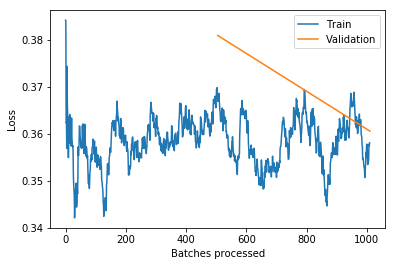

In [57]:
learnner.recorder.plot_losses()

In [54]:
row = raw_data.iloc[0]
row

age                                49
workclass                     Private
fnlwgt                         101320
education                  Assoc-acdm
education-num                      12
marital-status     Married-civ-spouse
occupation                        NaN
relationship                     Wife
race                            White
sex                            Female
capital-gain                        0
capital-loss                     1902
hours-per-week                     40
native-country          United-States
salary                          >=50k
Name: 0, dtype: object

In [55]:
learnner.predict(row)

(Category >=50k, tensor(1), tensor([0.4511, 0.5489]))

In [58]:
databunch = TabularDataBunch.from_df(path =data_path,df = raw_data,dep_var=dep_var,procs=proce,cat_names=cate,cont_names=num,valid_idx= list(range(800,1000)))

In [59]:
learner2 = tabular_learner(databunch,layers=[200,100],metrics=accuracy)

In [61]:
learner2.fit_one_cycle(1,max_lr = 1e-2)

epoch,train_loss,valid_loss,accuracy
1,0.361676,0.374563,0.820000


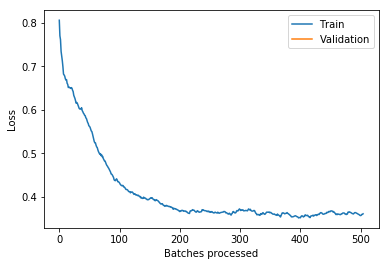

In [62]:
learner2.recorder.plot_losses()

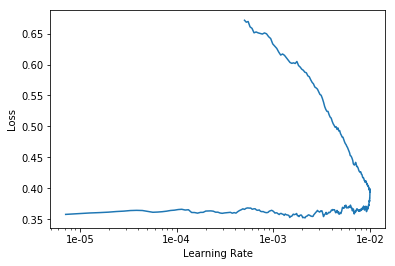

In [63]:
learner2.recorder.plot()